<a href="https://colab.research.google.com/github/Zydenn37/Yajit/blob/main/Data_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("Datasets Superstore.xlsx")
df.head()


Saving Datasets Superstore.xlsx to Datasets Superstore.xlsx


,Row ID,Order ID,Order Date,Year,Month,Day,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,November,8,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,Juni,12,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,Oktober,11,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()
print("\nMissing values:\n", df.isnull().sum())
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

Index(['Row ID', 'Order ID', 'Order Date', 'Year', 'Month', 'Day', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

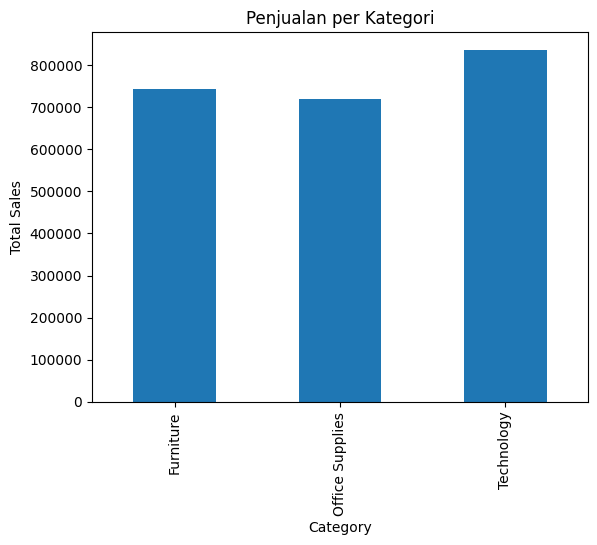

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Penjualan per Kategori')
plt.ylabel('Total Sales')
plt.show()


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       547
           1       0.96      0.96      0.96      2452

    accuracy                           0.93      2999
   macro avg       0.89      0.88      0.89      2999
weighted avg       0.93      0.93      0.93      2999

Confusion Matrix:
 [[ 442  105]
 [  97 2355]]


1. Import library yang dibutuhkan


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (df.head())

   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

2. Load dataset Iris


In [16]:
iris = load_iris()
X = iris.data
y = iris.target
print (df.head())

   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

 3. Membagi dataset menjadi data latih dan data uji


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (df.head())


   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

4. Normalisasi fitur


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print (df.head())

   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

5. Membuat dan melatih model KNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print (df.head())

   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

 6. Melakukan prediksi

In [20]:
y_pred = knn.predict(X_test)
print (df.head())


   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

7. Evaluasi hasil prediksi


In [21]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print (df.head())


Akurasi: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       P

8. Visualisasi Confusion Matrix


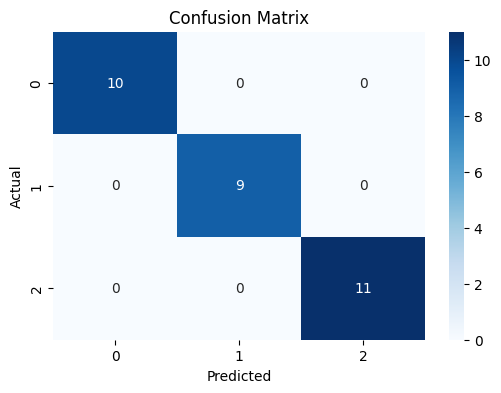

   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print (df.head())

Import library

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
print (df.head())

   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

Memuat dataset Iris

In [25]:
data_iris = load_iris()
fitur = data_iris.data       # Data fitur (panjang & lebar kelopak, dsb)
label = data_iris.target
print (df.head())

   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

Membagi data menjadi data latih dan data uji (70% latih, 30% uji)

In [26]:
X_latih, X_uji, y_latih, y_uji = train_test_split(fitur, label, test_size=0.3, random_state=1)
print (df.head())


   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

Membuat model KNN dengan jumlah tetangga k = 3

In [27]:
model_knn = KNeighborsClassifier(n_neighbors=3)
print (df.head())

   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

Melatih model dengan data latih

In [28]:
model_knn.fit(X_latih, y_latih)
print (df.head())

   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

Memprediksi data uji

In [29]:
prediksi = model_knn.predict(X_uji)
print (df.head())

   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture  

In [30]:
akurasi = accuracy_score(y_uji, prediksi)
print(f"Akurasi model KNN: {akurasi:.2f}")
print (df.head())

Akurasi model KNN: 0.98
   Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0       1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1       2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2       3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3       4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4       5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   

  Customer ID    Customer Name    Segment  ... Region       Product ID  \
0    CG-12520      Claire Gute   Consumer  ...  South  FUR-BO-10001798   
1    CG-12520      Claire Gute   Consumer  ...  South  FUR-CH-10000454   
2    DV-13045  Darrin Van Huff  Corporate  ...   West  OFF-LA-10000240   
3    SO-20335   Sean O'Donnell   Consumer  ...  South  FUR-TA-10000577   
4    SO-20335   Sean O'Donnell   Consumer  ...  South  OFF-ST-10000760   

          Category  Sub-Category  \
0        Furniture     Bookcases

Menghitung akurasi model